dict_keys(['__header__', '__version__', '__globals__', 'emg', 'acc', 'stimulus', 'glove', 'inclin', 'subject', 'exercise', 'repetition', 'restimulus', 'rerepetition'])
dict_keys(['__header__', '__version__', '__globals__', 'emg', 'acc', 'stimulus', 'glove', 'inclin', 'subject', 'exercise', 'repetition', 'restimulus', 'rerepetition'])
dict_keys(['__header__', '__version__', '__globals__', 'emg', 'acc', 'stimulus', 'force', 'forcecal', 'subject', 'exercise', 'activation', 'repetition', 'restimulus', 'rerepetition'])
(2397479, 12)
(2397479, 1)
(2397479, 36)
[[ 0]
 [ 0]
 [ 0]
 ...
 [48]
 [48]
 [48]]


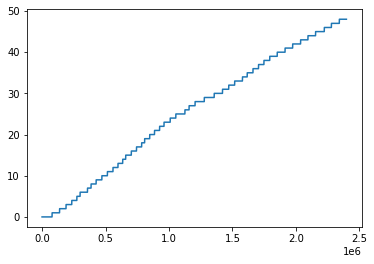

In [1]:
import scipy.io as scio
import matplotlib.pyplot as plt
%matplotlib inline

E1 = scio.loadmat('DB2/S1_E1_A1.mat')
E2 = scio.loadmat('DB2/S1_E2_A1.mat')
E3 = scio.loadmat('DB2/S1_E3_A1.mat')

print(E1.keys())
print(E2.keys())
print(E3.keys())

import numpy as np

E1_emg = E1['emg']
E2_emg = E2['emg']
E3_emg = E3['emg']

E1_acc = E1['acc']
E2_acc = E2['acc']
E3_acc = E3['acc']

E1_label = E1['restimulus']
E2_label = E2['restimulus']
E3_label = E3['restimulus']

index1 =[]
for i in range(len(E1_label)):
    if E1_label[i]!=0:
        index1.append(i)
label1 = E1_label[index1,:]
emg1 = E1_emg[index1,:]
acc1 = E1_acc[index1,:]

index2 =[]
for i in range(len(E2_label)):
    if E2_label[i]!=0:
        index2.append(i)
label2 = E2_label[index2,:]
emg2 = E2_emg[index2,:]
acc2 = E2_acc[index2,:]

index3 =[]
for i in range(len(E3_label)):
    if E3_label[i]!=0:
        index3.append(i)
label3 = E3_label[index3,:]
emg3 = E3_emg[index3,:]
acc3 = E3_acc[index3,:]

emg = np.vstack((emg1,emg2,emg3))
label = np.vstack((label1,label2,label3))
acc = np.vstack((acc1, acc2, acc3))
label = label-1

print(emg.shape)
print(label.shape)
print(acc.shape)
print(label)

plt.plot(label)

emg = emg * 20000

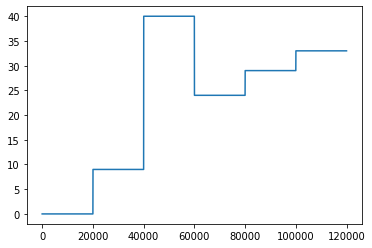

In [69]:
import random
length = 20000

emg_time = emg[0:length, :]
label_time = label[0:length, :]

for i in range(5):
    index = random.randint(0,120) * length
    emg_time = np.vstack((emg_time, emg[index:index+length]))
    label_time = np.vstack((label_time, label[index:index+length]))

plt.plot(label_time)

In [26]:
from tensorflow import keras
model = keras.models.load_model('model/wavelet_acc_200_60_model.h5')

In [11]:
import pywt
import pywt.data

mode = pywt.Modes.smooth

def plot_signal_decomp(data, w, title):
    w = pywt.Wavelet(w) #选取小波函数
    a = data
    ca = [] #近似分量
    cd = [] #细节分量
    for i in range(5):
        (a, d) = pywt.dwt(a, w, mode) #进行5阶离散小波变换
        ca.append(a)
        cd.append(d)

    rec_a = []
    rec_d = []

    for i, coeff in enumerate(ca):
        coeff_list = [coeff, None] + [None] * i
        rec_a.append(pywt.waverec(coeff_list, w))#重构

    for i, coeff in enumerate(cd):
        coeff_list = [None, coeff] + [None] * i
        rec_d.append(pywt.waverec(coeff_list, w))

    return rec_a

200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600
7800
8000
8200
8400
8600
8800
9000
9200
9400
9600
9800
10000
10200
10400
10600
10800
11000
11200
11400
11600
11800
12000
12200
12400
12600
12800
13000
13200
13400
13600
13800
14000
14200
14400
14600
14800
15000
15200
15400
15600
15800
16000
16200
16400
16600
16800
17000
17200
17400
17600
17800
18000
18200
18400
18600
18800
19000
19200
19400
19600
19800
20000
20200
20400
20600
20800
21000
21200
21400
21600
21800
22000
22200
22400
22600
22800
23000
23200
23400
23600
23800
24000
24200
24400
24600
24800
25000
25200
25400
25600
25800
26000
26200
26400
26600
26800
27000
27200
27400
27600
27800
28000
28200
28400
28600
28800
29000
29200
29400
29600
29800
30000
30200
30400
30600
30800
31000
31200
31400
31600
31800
32000
32200
32400
32600
32800
33000
33200
33400
33600
33800
34000
34200
34400
34600
34800
35000
352

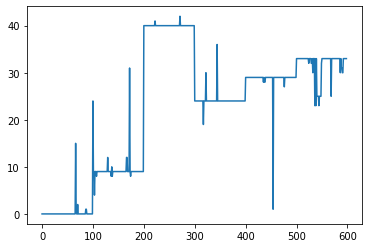

In [74]:
import time
index = 0
slide = 200
window = 200
res = []
lst = time.time()
pre_list=[]
label_list=[]


while index + window < 120000:
    subEmg = emg_time[index: index + window, :]
    subImage = []
    for k in range(0, 12):
         output = plot_signal_decomp(subEmg[:, k], 'sym5', "DWT")
         for obj in output:
            subImage.append(obj.tolist());
    subImage = list(map(list, zip(*subImage)))
    
    data = np.array(subImage)
    data = np.expand_dims(data, axis=0)
    data = np.expand_dims(data, axis=3)

    pre = model.predict(data, batch_size=1)
    mx = np.max(pre, axis = 1)
    ans = np.argmax(pre, axis = 1)
    res.append(ans)
    index = index + slide
    print(index)
    
    temp_label = np.zeros(49)
    temp_label[label_time[index]] = 1
    pre_list.append(pre[0])
    label_list.append(temp_label)
    
pre_list = np.array(pre_list)
label_list = np.array(label_list)
plt.plot(res)

In [77]:
import torch
import torch.nn as nn
import torch.optim as optim

class RNNClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNNClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # 初始化隐藏状态
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # 前向传播RNN
        out, _ = self.rnn(x, h0)
        
        # 取出RNN最后一个时间步的输出
        out = self.fc(out[:, :, :])
        return out

# 超参数设置
input_size = 49      # 输入特征的维度（即分类概率向量的维度）
hidden_size = 64     # RNN隐藏层的维度
num_layers = 2       # RNN的层数
num_classes = 49     # 类别数

# 实例化模型
rnn = RNNClassifier(input_size, hidden_size, num_layers, num_classes)

# 损失函数和优化器
criterion = nn.CrossEntropyLoss()  # 交叉熷损失，适用于分类任务
optimizer = optim.Adam(rnn.parameters(), lr=0.001)

# 假设有一批数据
# 输入数据，维度为(batch_size, seq_length, input_size)
# 例如，以下为随机生成的数据，假设序列长度为5
x_np = pre_list[np.newaxis, :]
x_dummy = torch.from_numpy(x_np)
# 真实标签，维度为(batch_size,)
y_np = label_list[np.newaxis, :]
y_dummy = torch.from_numpy(y_np)

# 训练模型
num_epochs = 100
for epoch in range(num_epochs):

    optimizer.zero_grad()
    print(x_dummy.shape)
    outputs = rnn(x_dummy)  # 前向传播
    print(outputs.shape)
    print(y_dummy.shape)
    loss = criterion(outputs, y_dummy)  # 计算损失
    loss.backward()  # 反向传播
    optimizer.step()  # 更新权重
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

# 保存模型
# torch.save(model.state_dict(), 'rnn_classifier.pth')

# 评估模型
# model.eval()
# 评估代码...

print(output)

torch.Size([1, 599, 49])
torch.Size([1, 599, 49])
torch.Size([1, 599, 49])
Epoch 1/100, Loss: 78.04865531532131
torch.Size([1, 599, 49])
torch.Size([1, 599, 49])
torch.Size([1, 599, 49])
Epoch 2/100, Loss: 77.74585248012932
torch.Size([1, 599, 49])
torch.Size([1, 599, 49])
torch.Size([1, 599, 49])
Epoch 3/100, Loss: 77.43955989759796
torch.Size([1, 599, 49])
torch.Size([1, 599, 49])
torch.Size([1, 599, 49])
Epoch 4/100, Loss: 77.11986840501123
torch.Size([1, 599, 49])
torch.Size([1, 599, 49])
torch.Size([1, 599, 49])
Epoch 5/100, Loss: 76.77622800943803
torch.Size([1, 599, 49])
torch.Size([1, 599, 49])
torch.Size([1, 599, 49])
Epoch 6/100, Loss: 76.39685877975153
torch.Size([1, 599, 49])
torch.Size([1, 599, 49])
torch.Size([1, 599, 49])
Epoch 7/100, Loss: 75.96826775219975
torch.Size([1, 599, 49])
torch.Size([1, 599, 49])
torch.Size([1, 599, 49])
Epoch 8/100, Loss: 75.47515841892788
torch.Size([1, 599, 49])
torch.Size([1, 599, 49])
torch.Size([1, 599, 49])
Epoch 9/100, Loss: 74.9014598

In [63]:
torch.save(rnn.state_dict(), 'model/rnn_classifier.pth')

In [75]:
x_np = pre_list[np.newaxis, :]
x_dummy = torch.from_numpy(x_np)
outputs = rnn(x_dummy)

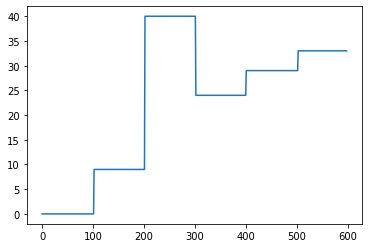

In [78]:
ans = outputs[0]
ans = torch.argmax(ans, dim=1).numpy()
plt.plot(ans)